# **Deep Learning for Skin Disease**
**Group-A8**

#Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Summary of Dataset:
The dataset contains 2 folders for images.


> Original Images: Contains 5 folders for 5 folds. Each fold seprate train,test,validation set. The number of images in each folds are:


1.   Fold 1:

    *   Train: 537
    *   Test: 74
    * Validation: 144

2.   Fold 2:

    *   Train: 509
    *   Test: 82
    * Validation: 164

3.   Fold 3:

    *   Train: 538
    *   Test: 64
    * Validation: 153

4.   Fold 4:

    *   Train: 524
    *   Test: 81
    * Validation: 150

5.   Fold 5:

    *   Train: 538
    *   Test: 63
    * Validation: 154



**So the total number of images combining all folds for original images:**

    * Train: 2646
    * Test: 364
    * Validation: 765


Augmented Images: Contains 5 folders for 5 folds. Each fold have just train set. The number of training images in each folds are:


1.   Fold 1 train images: 7518
2.   Fold 2 train images: 7126
3.   Fold 3 train images: 7532
4.   Fold 4 train images: 7336
5.   Fold 5 train images: 7532



























#Inspecting Dataset



In [ ]:
def get_class_names_from_folder(directory):

  #Get the classnames from train folder

  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)


class_names_multiclass= get_class_names_from_folder(directory="/content/drive/MyDrive/Project_AN_MonkeyPox/Original Images/FOLDS/fold1/Test")
print(class_names_multiclass)


['Chickenpox' 'Cowpox' 'HFMD' 'Healthy' 'Measles' 'Monkeypox']


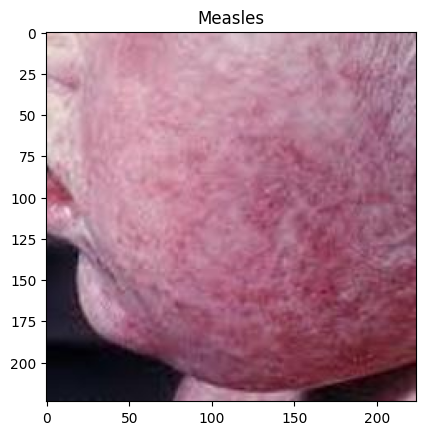

In [ ]:
# creating a fucntion to visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):

  #Visualises random image from exact directory

  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("/content/drive/MyDrive/Project_AN_MonkeyPox/Original Images/FOLDS/fold1/Test/","Measles")



---



#Data Preparation for working with a single fold (Fold 1) Multiclass Image classifier

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #using image data generator for preprocessing of image

train_datagen = ImageDataGenerator(rescale=1/255
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Project_AN_MonkeyPox/Original Images/FOLDS/fold1/Train",
                                               target_size=(224, 224),

                                               batch_size=20,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Project_AN_MonkeyPox/Original Images/FOLDS/fold1/Test",
                                               target_size=(224, 224),

                                               batch_size=20,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Project_AN_MonkeyPox/Original Images/FOLDS/fold1/Valid",
                                               target_size=(224, 224),

                                               batch_size=20,
                                               class_mode="categorical")


Found 537 images belonging to 6 classes.
Found 74 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


#Compiling the only CNN Layer by Layer Model:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

model1 = Sequential([
    # CNN Block 1
    Conv2D(64, (3,3), activation="relu", input_shape=(224, 224, 3)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    # CNN Block 2
    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    # CNN Block 3
    Conv2D(256, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(256, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(256, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    # CNN Block 4
    Conv2D(512, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(512, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(512, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation="relu"),
    #Dropout(0.1),  # Regularization
    Dense(256, activation="relu"),
    #Dropout(0.1),  # Regularization
    Dense(6, activation="softmax")
])

# Compile the model
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Model summary
model1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_210 (Conv2D)                  │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_208              │ (None, 222, 222, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_211 (Conv2D)                  │ (None, 220, 220, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_209              │ (None, 220, 220, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_212 (Conv2D)                  │ (None, 108, 108, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_210              │ (None, 108, 108, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_213 (Conv2D)                  │ (None, 106, 106, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_211              │ (None, 106, 106, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 53, 53, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_214 (Conv2D)                  │ (None, 51, 51, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_212              │ (None, 51, 51, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_215 (Conv2D)                  │ (None, 49, 49, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_213              │ (None, 49, 49, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_216 (Conv2D)                  │ (None, 47, 47, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_214              │ (None, 47, 47, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 23, 23, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_217 (Conv2D)                  │ (None, 21, 21, 512)         │       1,180,1

 Total params: 24,556,614 (93.68 MB)

 Trainable params: 24,551,238 (93.66 MB)

 Non-trainable params: 5,376 (21.00 KB)

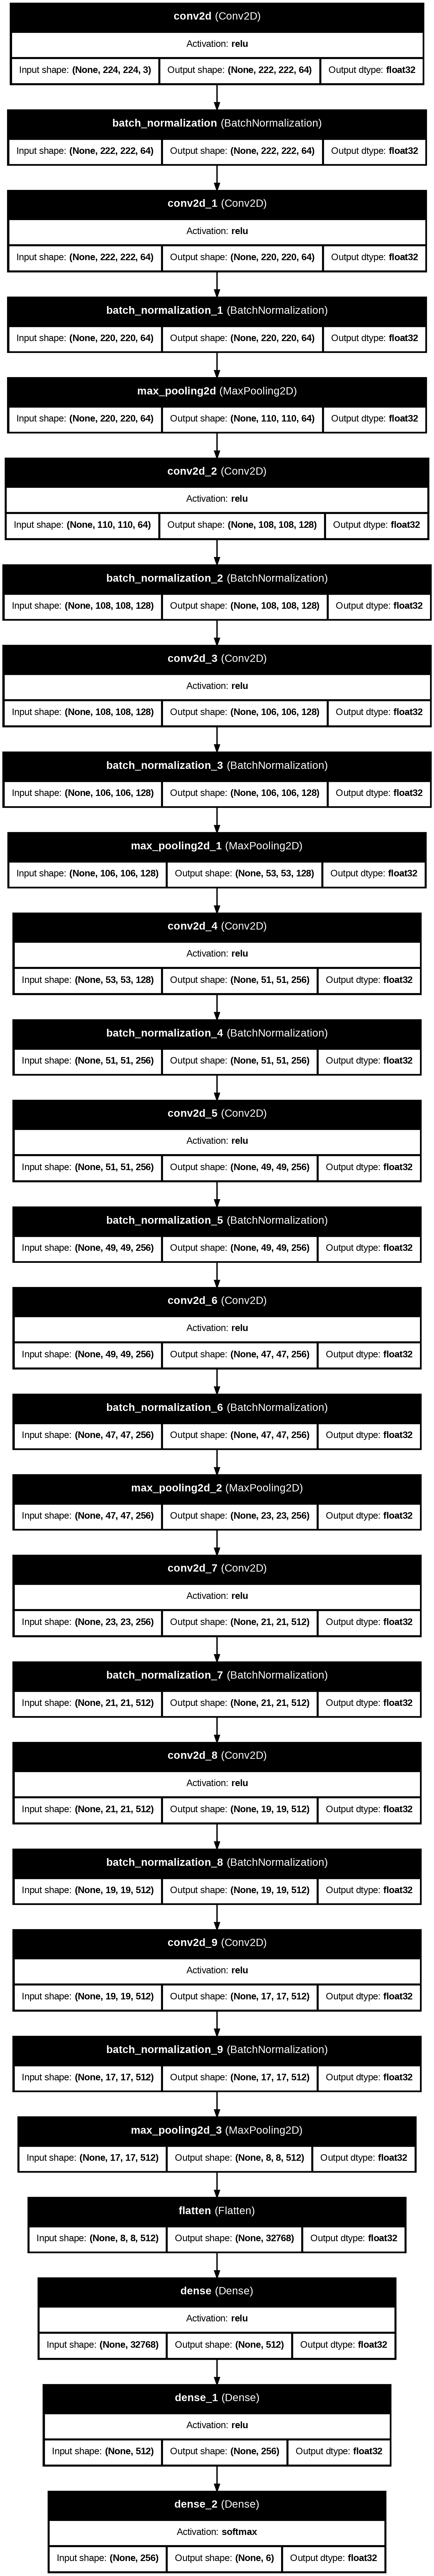

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, show_layer_activations=True)

In [ ]:
# Define a log directory for TensorBoard
log_dir = "logs1/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# Create confusion matrix callback
#confusion_matrix_callback = ConfusionMatrixCallback(validation_data)
#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model with both callbacks
history_v1 = model1.fit(
    train_data,
    epochs=100,
    validation_data=validation_data,
    steps_per_epoch=17,  # steps_per_epoch = total_samples // batch_size
    callbacks=[early_stop]  # Add both callbacks
)
#callbacks=[early_stop, tensorboard_callback, confusion_matrix_callback]

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 693ms/step - accuracy: 0.3125 - loss: 7.9792 - val_accuracy: 0.1597 - val_loss: 373.8787
Epoch 2/100
10/17 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 0.2667 - loss: 6.3735

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.2743 - loss: 6.3204 - val_accuracy: 0.2986 - val_loss: 39.6278
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 323ms/step - accuracy: 0.3023 - loss: 4.7892 - val_accuracy: 0.1806 - val_loss: 79.3208
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.4289 - loss: 3.8539 - val_accuracy: 0.1528 - val_loss: 56.3873
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.3725 - loss: 3.3730 - val_accuracy: 0.1875 - val_loss: 8.3949
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.3955 - loss: 2.5646 - val_accuracy: 0.1597 - val_loss: 13.0474
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step - accuracy: 0.4693 - loss: 1.8786 - val_accuracy: 0.3542 - val_loss: 8.8304
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.3484 - loss: 1.8320 - val_accuracy: 0.1458 - val_loss: 5.6198
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - accuracy: 0.4690 - loss: 1.6040 - val_accuracy: 0

In [ ]:
#evaluating on test data
model1.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3589 - loss: 2.0645


[2.0083987712860107, 0.3513513505458832]

<Axes: >

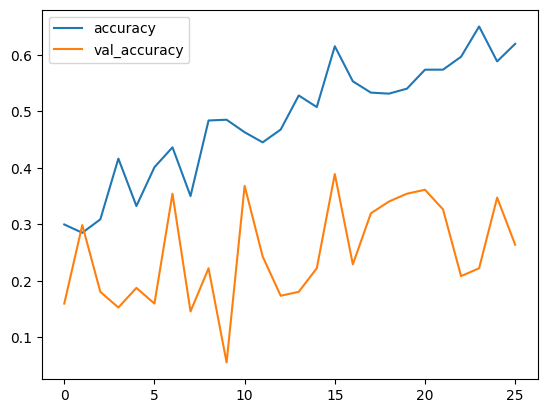

In [ ]:
df1= pd.DataFrame(history_v1.history)
#plotting accuracy progress
df1[["accuracy","val_accuracy"]].plot()

<Axes: >

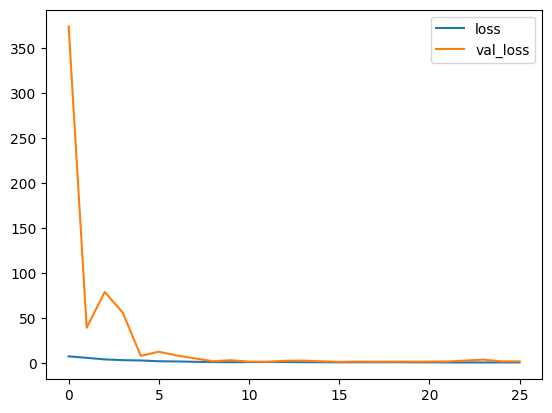

In [ ]:
df1[["loss","val_loss"]].plot()



---







# Binary Classifier Combining all Folds:

Preparing Image generators combining all folds and all classes for Non MonkeyPox cases.

In [ ]:
def get_class_names_from_folder(directory):

  #Get the classnames from train folder

  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
  return class_names
  print(class_names)
  /content/drive/Shareddrives

class_names = get_class_names_from_folder(directory="/content/drive/MyDrive/Project_AN_MonkeyPox/dataset_v1.1/Train")
print(class_names)

['Monkeypox' 'Non_Monkeypox']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range= 30,
                                   shear_range=.2,
                                   zoom_range=0.4,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Project_AN_MonkeyPox/dataset_v1.1/Train",
                                               target_size=(224, 224),

                                               batch_size=32,
                                               class_mode="binary")

test_data = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Project_AN_MonkeyPox/dataset_v1.1/Test",
                                               target_size=(224, 224),

                                               batch_size=32,
                                               class_mode="binary")

validation_data = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Project_AN_MonkeyPox/dataset_v1.1/Valid",
                                               target_size=(224, 224),

                                               batch_size=32,
                                               class_mode="binary")

Found 1005 images belonging to 2 classes.
Found 297 images belonging to 2 classes.
Found 292 images belonging to 2 classes.


Have roughy 60-20-20 split

Compiling CNN layer by layer architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

model2 = Sequential([
    # CNN Block 1
    Conv2D(32, (3,3), activation="relu", input_shape=(224, 224, 3)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2),strides=2,padding='same'),

    # CNN Block 2
    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2),strides=2,padding='same'),

    # CNN Block 3
    Conv2D(256, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(256, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(256, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2),strides=2,padding='same'),

    # CNN Block 4
    Conv2D(512, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(512, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(512, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2),strides=2,padding='same'),

    # Fully Connected Layers
    Flatten(),
    #Dense(512, activation="relu"), #remove as not needed for now as increasing parameter
    Dropout(0.1),  # Regularization
    Dense(256, activation="relu"),
    Dropout(0.1),  # Regularization
    Dense(1, activation="sigmoid")
])

# Compile the model
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Model summary
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 220, 220, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 220, 220, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 108, 108, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 108, 108, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 106, 106, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 106, 106, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 53, 53, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 51, 51, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 51, 51, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 49, 49, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 49, 49, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 47, 47, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 47, 47, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 22, 22, 512)         │       1,180,1

 Total params: 18,243,905 (69.59 MB)

 Trainable params: 18,238,593 (69.57 MB)

 Non-trainable params: 5,312 (20.75 KB)

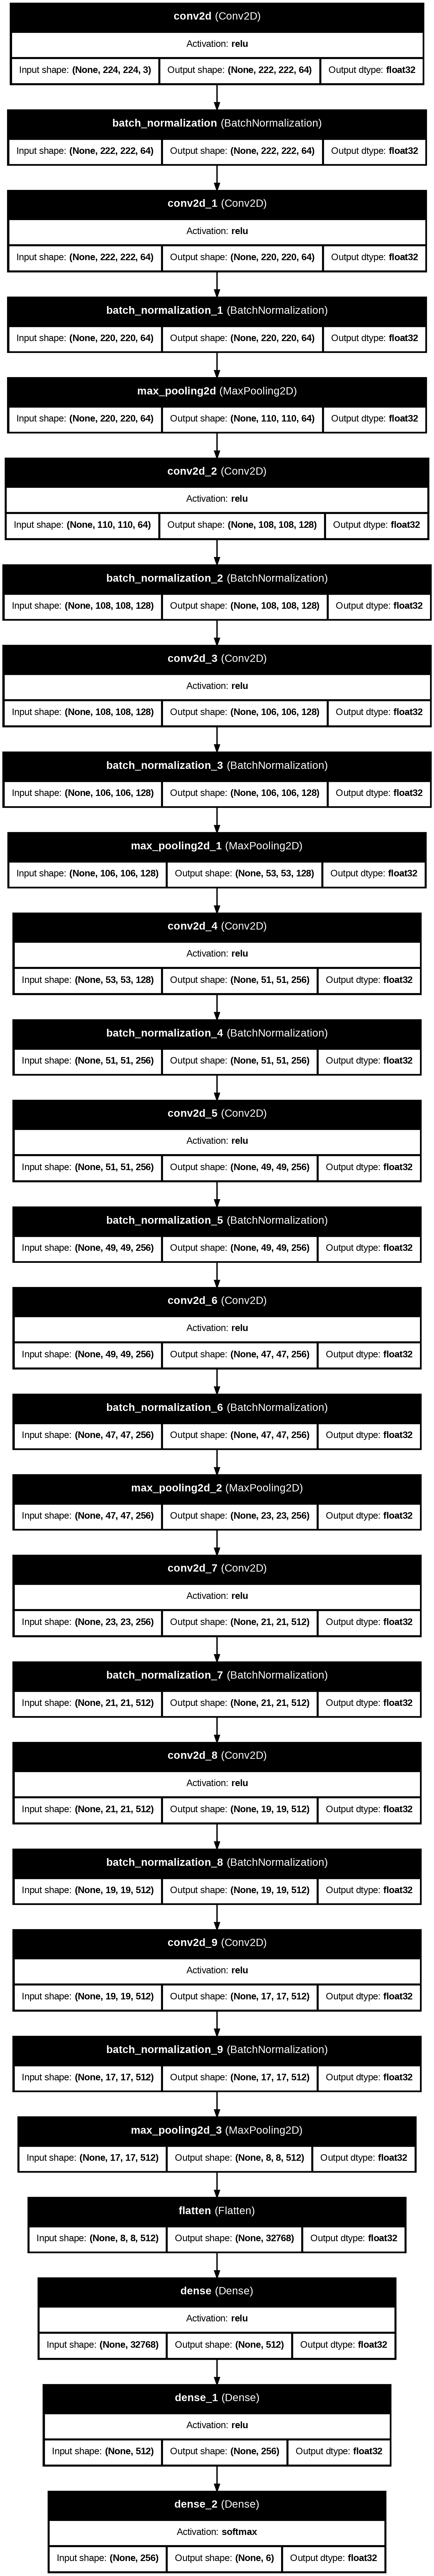

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, show_layer_activations=True)

Model Fitting:

In [ ]:
# Define a log directory for TensorBoard
log_dir = "logs2/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# Create confusion matrix callback
confusion_matrix_callback = ConfusionMatrixCallback(validation_data)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model with both callbacks
history_v2 = model2.fit(
    train_data,
    epochs=100,
    validation_data=validation_data,
    steps_per_epoch=17,  # steps_per_epoch = total_samples // batch_size
    callbacks=[early_stop, tensorboard_callback, confusion_matrix_callback]  # Add both callbacks
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 283s 14s/step - accuracy: 0.5597 - loss: 14.3230 - val_accuracy: 0.6781 - val_loss: 50.8510
Epoch 2/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.5554 - loss: 8.5373

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.5582 - loss: 8.4605 - val_accuracy: 0.6815 - val_loss: 231.7635
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5257 - loss: 6.5614 - val_accuracy: 0.6781 - val_loss: 189.3192
Epoch 4/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5487 - loss: 4.0536

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5492 - loss: 3.9350 - val_accuracy: 0.6849 - val_loss: 60.5526
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5179 - loss: 2.7294 - val_accuracy: 0.6473 - val_loss: 4.6225
Epoch 6/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - accuracy: 0.5998 - loss: 1.1955

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5957 - loss: 1.2095 - val_accuracy: 0.5993 - val_loss: 0.9538
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6442 - loss: 1.0852 - val_accuracy: 0.6336 - val_loss: 0.9120
Epoch 8/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.5554 - loss: 0.8733

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5592 - loss: 0.8671 - val_accuracy: 0.6301 - val_loss: 0.8199
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6424 - loss: 0.7090 - val_accuracy: 0.6781 - val_loss: 0.6967
Epoch 10/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step - accuracy: 0.6183 - loss: 0.8198

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6181 - loss: 0.8134 - val_accuracy: 0.6575 - val_loss: 0.6849
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6461 - loss: 0.6792 - val_accuracy: 0.6610 - val_loss: 0.7096
Epoch 12/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - accuracy: 0.6773 - loss: 0.6318

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6770 - loss: 0.6357 - val_accuracy: 0.5171 - val_loss: 0.9766
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6494 - loss: 0.6958 - val_accuracy: 0.6164 - val_loss: 0.6762
Epoch 14/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - accuracy: 0.6132 - loss: 0.6885

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6163 - loss: 0.6850 - val_accuracy: 0.5240 - val_loss: 0.7567
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6560 - loss: 0.6420 - val_accuracy: 0.6473 - val_loss: 0.6843
Epoch 16/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - accuracy: 0.6452 - loss: 0.6431

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6466 - loss: 0.6437 - val_accuracy: 0.5445 - val_loss: 0.7709
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6401 - loss: 0.6656 - val_accuracy: 0.4795 - val_loss: 0.8445
Epoch 18/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step - accuracy: 0.6478 - loss: 0.6102

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6498 - loss: 0.6126 - val_accuracy: 0.5479 - val_loss: 0.7286
Epoch 19/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6529 - loss: 0.6379 - val_accuracy: 0.5582 - val_loss: 0.7732
Epoch 20/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step - accuracy: 0.6462 - loss: 0.6231

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6473 - loss: 0.6249 - val_accuracy: 0.5171 - val_loss: 0.7773
Epoch 21/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6620 - loss: 0.6596 - val_accuracy: 0.4726 - val_loss: 0.8130
Epoch 22/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - accuracy: 0.6587 - loss: 0.7148

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6596 - loss: 0.7136 - val_accuracy: 0.4623 - val_loss: 0.8784
Epoch 23/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6223 - loss: 0.6851 - val_accuracy: 0.5788 - val_loss: 0.7310


In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs2/fit

In [ ]:
df_v2 = pd.DataFrame(history_v2.history)
df_v2.tail()

accuracy      loss  val_accuracy  val_loss
18  0.628676  0.675629      0.558219  0.773198
19  0.655098  0.638408      0.517123  0.777327
20  0.691429  0.623982      0.472603  0.812963
21  0.666667  0.704275      0.462329  0.878363
22  0.628571  0.688350      0.578767  0.731011

<Axes: >

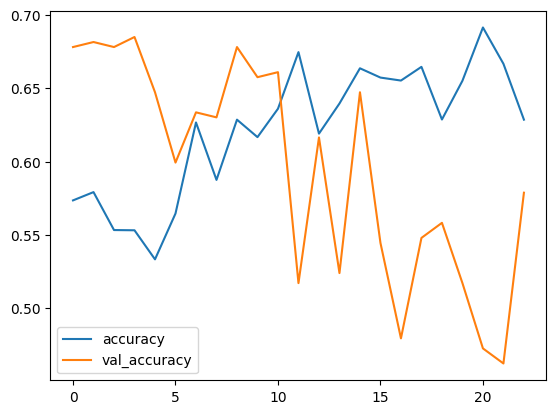

In [ ]:
#plotting accuracy progress
df_v2[["accuracy","val_accuracy"]].plot()

<Axes: >

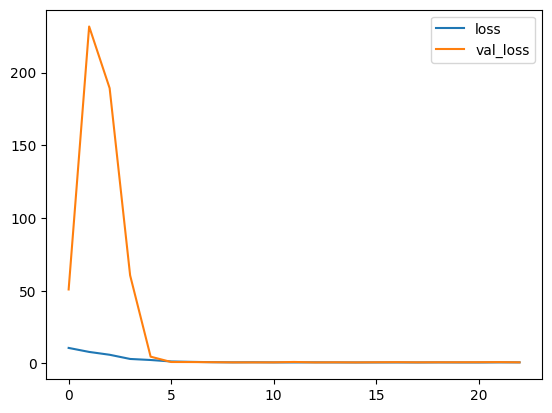

In [ ]:
#plotting loss progress
df_v2[["loss","val_loss"]].plot()

In [ ]:
#evaluating on test data
model2.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 88s 9s/step - accuracy: 0.6303 - loss: 0.6738


[0.6715610027313232, 0.6397306323051453]

Summary:
1st model with more deep architecture and was trained with 78 epochs. Training accuracy was 0.673, validation accuracy: 0.688, and test accuracy was 0.6911. Model was saved with name binary_monkeyv2



---



# Binary Classifier with different Transfer Learning approaches:


# Transfer Learning with fine Tuning:


In [ ]:
#downloading Inception V3

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2025-03-22 12:19:00--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   111MB/s    in 0.8s    

2025-03-22 12:19:01 (111 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



Using Inception V3 with trainable layers:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model1 = InceptionV3(input_shape = (224, 224, 3),
                                  include_top = False,
                                  weights = None)

pre_trained_model1.load_weights(local_weights_file)

for layer in pre_trained_model1.layers:
  layer.trainable = True

pre_trained_model1.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 111, 111, 32)   │             96 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 109, 109, 32)   │             96 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 109, 109, 64)   │            192 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_23    │ (None, 54, 54, 80)     │            240 │ conv2d_23[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_24    │ (None, 52, 52, 192)    │            576 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
#gluing to my own network
x = pre_trained_model1.output
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(inputs=pre_trained_model1.input, outputs=output)

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 111, 111, 32)   │             96 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 109, 109, 32)   │             96 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 109, 109, 64)   │            192 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_23    │ (None, 54, 54, 80)     │            240 │ conv2d_23[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_24    │ (None, 52, 52, 192)    │            576 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 24,228,257 (92.42 MB)

 Trainable params: 24,193,825 (92.29 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
# Define a log directory for TensorBoard
log_dir = "logs3/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# Create confusion matrix callback
confusion_matrix_callback = ConfusionMatrixCallback(validation_data)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model with both callbacks
history_v3 = model3.fit(
    train_data,
    epochs=100,
    validation_data=validation_data,
    steps_per_epoch=17,  # steps_per_epoch = total_samples // batch_size
    callbacks=[early_stop, tensorboard_callback, confusion_matrix_callback]  # Add both callbacks
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 725ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.5326 - loss: 1.3183 - val_accuracy: 0.6781 - val_loss: 1.5074
Epoch 2/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - accuracy: 0.7032 - loss: 0.5771

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7037 - loss: 0.5754 - val_accuracy: 0.3596 - val_loss: 23.9474
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6519 - loss: 0.6262 - val_accuracy: 0.6712 - val_loss: 13.4936
Epoch 4/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step - accuracy: 0.7484 - loss: 0.5106

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7484 - loss: 0.5103 - val_accuracy: 0.6781 - val_loss: 10.4106
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7526 - loss: 0.5094 - val_accuracy: 0.3288 - val_loss: 5.0361
Epoch 6/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step - accuracy: 0.7172 - loss: 0.5536

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7194 - loss: 0.5512 - val_accuracy: 0.4041 - val_loss: 0.8342
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7838 - loss: 0.4567 - val_accuracy: 0.6027 - val_loss: 0.8211
Epoch 8/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - accuracy: 0.7943 - loss: 0.5098

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7940 - loss: 0.5094 - val_accuracy: 0.7021 - val_loss: 2.4988
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7663 - loss: 0.5256 - val_accuracy: 0.3562 - val_loss: 2.3689
Epoch 10/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step - accuracy: 0.7349 - loss: 0.5410

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7352 - loss: 0.5399 - val_accuracy: 0.6781 - val_loss: 171.0982
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7792 - loss: 0.4836 - val_accuracy: 0.3219 - val_loss: 820.1228
Epoch 12/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - accuracy: 0.7845 - loss: 0.5060

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7863 - loss: 0.5021 - val_accuracy: 0.6781 - val_loss: 2.4361
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8254 - loss: 0.4314 - val_accuracy: 0.6712 - val_loss: 1.0495
Epoch 14/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - accuracy: 0.7542 - loss: 0.5245

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7561 - loss: 0.5235 - val_accuracy: 0.6712 - val_loss: 1.6987
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7366 - loss: 0.5058 - val_accuracy: 0.3493 - val_loss: 4773.5752
Epoch 16/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - accuracy: 0.7671 - loss: 0.7904

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7697 - loss: 0.7671 - val_accuracy: 0.6781 - val_loss: 607.6307
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7863 - loss: 0.4607 - val_accuracy: 0.6781 - val_loss: 90.8677


In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs3/fit

Checking Results:

In [ ]:
df_v3 = pd.DataFrame(history_v3.history)
df_v3.tail()

accuracy      loss  val_accuracy     val_loss
12  0.830882  0.420663      0.671233     1.049517
13  0.770065  0.515851      0.671233     1.698743
14  0.752381  0.506027      0.349315  4773.575195
15  0.789583  0.592676      0.678082   607.630737
16  0.777574  0.497713      0.678082    90.867729

<Axes: >

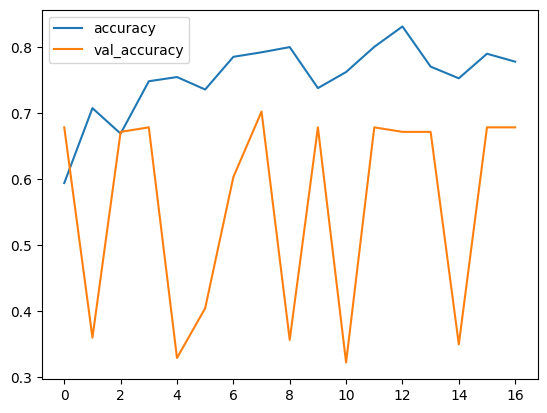

In [ ]:
#plotting accuracy progress
df_v3[["accuracy","val_accuracy"]].plot()

<Axes: >

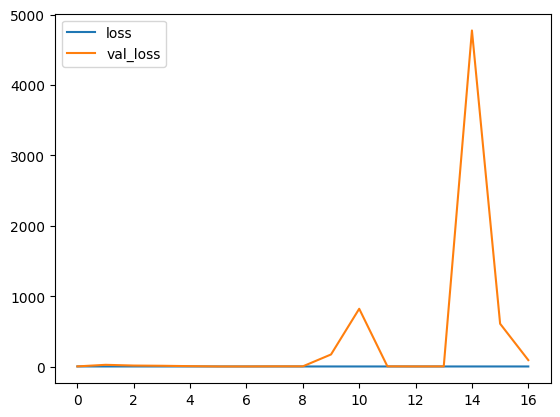

In [ ]:
#plotting loss progress
df_v3[["loss","val_loss"]].plot()

Testing on Test Set:

In [ ]:
#evaluating on test data
model3.evaluate(test_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 702ms/step - accuracy: 0.6885 - loss: 86.8385


[85.26207733154297, 0.6868686676025391]

# Trasnfer Learning with Layer freezing:

Using Inception V3 with frozen layers

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model2 = InceptionV3(input_shape = (224, 224, 3),
                                  include_top = False,
                                  weights = None)

pre_trained_model2.load_weights(local_weights_file)

for layer in pre_trained_model2.layers:
  layer.trainable = False

pre_trained_model2.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_115 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_114   │ (None, 111, 111, 32)   │             96 │ conv2d_115[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_116 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_115   │ (None, 109, 109, 32)   │             96 │ conv2d_116[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_117 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_116   │ (None, 109, 109, 64)   │            192 │ conv2d_117[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_118 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_117   │ (None, 54, 54, 80)     │            240 │ conv2d_118[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_119 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
#gluing to my own network
x = pre_trained_model2.output
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model4 = Model(inputs=pre_trained_model2.input, outputs=output)

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_115 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_114   │ (None, 111, 111, 32)   │             96 │ conv2d_115[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_116 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_115   │ (None, 109, 109, 32)   │             96 │ conv2d_116[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_117 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_116   │ (None, 109, 109, 64)   │            192 │ conv2d_117[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_118 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_117   │ (None, 54, 54, 80)     │            240 │ conv2d_118[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_119 (Conv2D)  

 Total params: 24,228,257 (92.42 MB)

 Trainable params: 2,425,473 (9.25 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Define a log directory for TensorBoard
log_dir = "logs4/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# Create confusion matrix callback
confusion_matrix_callback = ConfusionMatrixCallback(validation_data)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model with both callbacks
history_v4 = model4.fit(
    train_data,
    epochs=100,
    validation_data=validation_data,
    steps_per_epoch=17,  # steps_per_epoch = total_samples // batch_size
    callbacks=[early_stop, tensorboard_callback, confusion_matrix_callback]  # Add both callbacks
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.5509 - loss: 1.7266 - val_accuracy: 0.5925 - val_loss: 0.7363
Epoch 2/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.6537 - loss: 0.7066

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6584 - loss: 0.6986 - val_accuracy: 0.6233 - val_loss: 0.6899
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7151 - loss: 0.5530 - val_accuracy: 0.7603 - val_loss: 0.5283
Epoch 4/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.6761 - loss: 0.7290

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6792 - loss: 0.7184 - val_accuracy: 0.7397 - val_loss: 0.5459
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7580 - loss: 0.5066 - val_accuracy: 0.7671 - val_loss: 0.5296
Epoch 6/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.7459 - loss: 0.5187

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7432 - loss: 0.5254 - val_accuracy: 0.7363 - val_loss: 0.5474
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7715 - loss: 0.4771 - val_accuracy: 0.7226 - val_loss: 0.6612
Epoch 8/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step - accuracy: 0.7530 - loss: 0.5883

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7551 - loss: 0.5800 - val_accuracy: 0.7979 - val_loss: 0.4873
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7922 - loss: 0.4631 - val_accuracy: 0.6438 - val_loss: 0.7161
Epoch 10/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - accuracy: 0.7782 - loss: 0.5127

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7826 - loss: 0.5045 - val_accuracy: 0.8014 - val_loss: 0.4761
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7645 - loss: 0.4814 - val_accuracy: 0.6336 - val_loss: 0.7119
Epoch 12/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - accuracy: 0.7080 - loss: 0.6146

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7117 - loss: 0.6090 - val_accuracy: 0.6404 - val_loss: 0.7105
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7909 - loss: 0.5006 - val_accuracy: 0.7911 - val_loss: 0.4926
Epoch 14/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step - accuracy: 0.8086 - loss: 0.3942

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8086 - loss: 0.3969 - val_accuracy: 0.8014 - val_loss: 0.4531
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8010 - loss: 0.4157 - val_accuracy: 0.7774 - val_loss: 0.4763
Epoch 16/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step - accuracy: 0.7983 - loss: 0.4474

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7990 - loss: 0.4471 - val_accuracy: 0.6781 - val_loss: 0.6293
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7532 - loss: 0.4654 - val_accuracy: 0.7740 - val_loss: 0.4875
Epoch 18/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step - accuracy: 0.8352 - loss: 0.3606

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8336 - loss: 0.3624 - val_accuracy: 0.8048 - val_loss: 0.4607
Epoch 19/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8202 - loss: 0.3772 - val_accuracy: 0.8014 - val_loss: 0.4725
Epoch 20/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - accuracy: 0.7980 - loss: 0.4632

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7963 - loss: 0.4614 - val_accuracy: 0.7432 - val_loss: 0.4830
Epoch 21/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8440 - loss: 0.3644 - val_accuracy: 0.8390 - val_loss: 0.4122
Epoch 22/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - accuracy: 0.7608 - loss: 0.4809

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7627 - loss: 0.4775 - val_accuracy: 0.8185 - val_loss: 0.4153
Epoch 23/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8703 - loss: 0.3401 - val_accuracy: 0.8048 - val_loss: 0.4825
Epoch 24/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - accuracy: 0.8510 - loss: 0.3726

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8502 - loss: 0.3713 - val_accuracy: 0.7979 - val_loss: 0.4505
Epoch 25/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8345 - loss: 0.3848 - val_accuracy: 0.8356 - val_loss: 0.3935
Epoch 26/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.8251 - loss: 0.3872

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8260 - loss: 0.3848 - val_accuracy: 0.7397 - val_loss: 0.4854
Epoch 27/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8464 - loss: 0.3375 - val_accuracy: 0.8425 - val_loss: 0.3830
Epoch 28/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8780 - loss: 0.3433

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8734 - loss: 0.3510 - val_accuracy: 0.8048 - val_loss: 0.5193
Epoch 29/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8174 - loss: 0.4133 - val_accuracy: 0.7808 - val_loss: 0.4420
Epoch 30/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.8567 - loss: 0.3400

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8572 - loss: 0.3400 - val_accuracy: 0.8082 - val_loss: 0.4275
Epoch 31/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7828 - loss: 0.4438 - val_accuracy: 0.8048 - val_loss: 0.4694
Epoch 32/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8469 - loss: 0.3546

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8458 - loss: 0.3555 - val_accuracy: 0.8356 - val_loss: 0.3804
Epoch 33/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8479 - loss: 0.3588 - val_accuracy: 0.7603 - val_loss: 0.4424
Epoch 34/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8581 - loss: 0.3138

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8593 - loss: 0.3122 - val_accuracy: 0.8562 - val_loss: 0.3659
Epoch 35/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8273 - loss: 0.3760 - val_accuracy: 0.8253 - val_loss: 0.3902
Epoch 36/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.8469 - loss: 0.3532

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8468 - loss: 0.3510 - val_accuracy: 0.8356 - val_loss: 0.3836
Epoch 37/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8549 - loss: 0.3181 - val_accuracy: 0.8630 - val_loss: 0.3824
Epoch 38/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.8338 - loss: 0.3724

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8330 - loss: 0.3750 - val_accuracy: 0.8116 - val_loss: 0.4068
Epoch 39/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8070 - loss: 0.3936 - val_accuracy: 0.8390 - val_loss: 0.4028
Epoch 40/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step - accuracy: 0.8517 - loss: 0.3114

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8520 - loss: 0.3132 - val_accuracy: 0.7979 - val_loss: 0.3950
Epoch 41/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8493 - loss: 0.3567 - val_accuracy: 0.7774 - val_loss: 0.4563
Epoch 42/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - accuracy: 0.8277 - loss: 0.3586

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8295 - loss: 0.3564 - val_accuracy: 0.8630 - val_loss: 0.3633
Epoch 43/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8681 - loss: 0.3270 - val_accuracy: 0.8459 - val_loss: 0.3781
Epoch 44/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step - accuracy: 0.8560 - loss: 0.3773

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8556 - loss: 0.3768 - val_accuracy: 0.7979 - val_loss: 0.4088
Epoch 45/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8674 - loss: 0.3362 - val_accuracy: 0.8527 - val_loss: 0.3881
Epoch 46/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step - accuracy: 0.8955 - loss: 0.2528

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8935 - loss: 0.2578 - val_accuracy: 0.8390 - val_loss: 0.3745
Epoch 47/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8579 - loss: 0.3349 - val_accuracy: 0.8356 - val_loss: 0.3928
Epoch 48/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 0.8120 - loss: 0.3712

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8155 - loss: 0.3668 - val_accuracy: 0.7877 - val_loss: 0.4374
Epoch 49/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8821 - loss: 0.3034 - val_accuracy: 0.8288 - val_loss: 0.3877
Epoch 50/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - accuracy: 0.7891 - loss: 0.4148

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7884 - loss: 0.4157 - val_accuracy: 0.8493 - val_loss: 0.3843
Epoch 51/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8342 - loss: 0.3624 - val_accuracy: 0.8356 - val_loss: 0.4575
Epoch 52/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step - accuracy: 0.8024 - loss: 0.3792

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8032 - loss: 0.3804 - val_accuracy: 0.8596 - val_loss: 0.3789


In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs4/fit

Cheking the results:

In [ ]:
df_v4 = pd.DataFrame(history_v4.history)
df_v4.tail()

accuracy      loss  val_accuracy  val_loss
47  0.841667  0.334113      0.787671  0.437429
48  0.869485  0.312580      0.828767  0.387707
49  0.783080  0.422388      0.849315  0.384296
50  0.830882  0.356616      0.835616  0.457504
51  0.809111  0.388928      0.859589  0.378850

<Axes: >

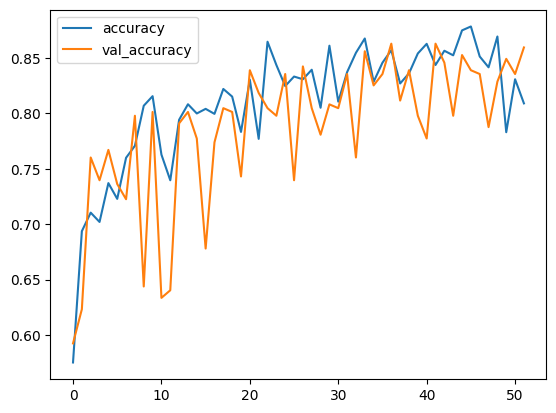

In [ ]:
#plotting accuracy progress
df_v4[["accuracy","val_accuracy"]].plot()

<Axes: >

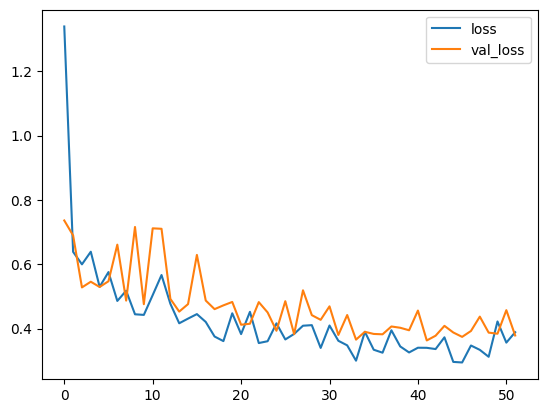

In [ ]:
#plotting loss progress
df_v4[["loss","val_loss"]].plot()

Testing on Test set

In [ ]:
#evaluating on test data
model4.evaluate(test_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 428ms/step - accuracy: 0.8861 - loss: 0.2544


[0.26846393942832947, 0.8855218887329102]



---



#Saving a Model

In [ ]:
from tensorflow.keras.models import load_model
os.chdir("/content/drive/MyDrive/Project_AN_MonkeyPox")
os.getcwd()
model_v2.save(os.path.join('binary_monkeyv2.h5'))



---



# **Loading Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
os.chdir("/content/drive/MyDrive/Project_AN_MonkeyPox")
model1 = load_model('/content/drive/MyDrive/Project_AN_MonkeyPox/multi_class_model1.h5')
model2 = load_model('/content/drive/MyDrive/Project_AN_MonkeyPox/binary_class_model1.h5')
model3 = load_model('/content/drive/MyDrive/Project_AN_MonkeyPox/binary_class_tl_trainable_model1.h5')
model4 = load_model('/content/drive/MyDrive/Project_AN_MonkeyPox/binary_class_tl_frozen_model1.h5')



---



# **Testing Random Images for Prediction**

In [ ]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

In [ ]:
img_path="/content/Monkeypox image.jpeg"
image = load_and_resize_image(img_path, 224)
plt.imshow(image)

For Binary_Classifier:

In [ ]:
new_pred=model4.predict(tf.expand_dims(image, axis=0))
new_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


array([[0.0774672]], dtype=float32)

In [ ]:
#For Binary Classifier
probability_value=new_pred_name=new_pred[0]
if probability_value<0.5:
  print("MonkeyPox")
else:
  print("Healthy Skin")

MonkeyPox


Prediction from Multi-class Classifier:

In [ ]:
pred=model1.predict(tf.expand_dims(image, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step


array([[4.8887390e-01, 1.4784790e-04, 2.7144421e-03, 1.7391546e-01,
        6.7856330e-05, 3.3428052e-01]], dtype=float32)

In [ ]:
#For Multiclass
pred_name=class_names_multiclass[new_pred[0].argmax()]
pred_name

np.str_('Chickenpox')

# **Some Defined Callbacks:**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
import datetime

In [ ]:
# Define a log directory for TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import io

class ConfusionMatrixCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        # Get predictions
        y_pred = self.model.predict(self.validation_data)
        y_pred = np.round(y_pred).astype(int).flatten()

        # Get true labels
        y_true = self.validation_data.labels

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        figure = self.plot_confusion_matrix(cm, class_names=['Class 0', 'Class 1'])
        cm_image = self.plot_to_image(figure)

        # Log confusion matrix to TensorBoard
        with tf.summary.create_file_writer(log_dir).as_default():
            tf.summary.image("Confusion Matrix", cm_image, step=epoch)

    def plot_confusion_matrix(self, cm, class_names):
        figure = plt.figure(figsize=(8, 8))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")

        # Add values to the plot
        threshold = cm.max() / 2.0  # Threshold for text color
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i, j], 'd'),  # Display the value
                         horizontalalignment="center",
                         color="white" if cm[i, j] > threshold else "black")

        plt.tight_layout()
        return figure

    def plot_to_image(self, figure):
        # Save the plot to a PNG in memory
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        plt.close(figure)
        buf.seek(0)
        # Convert PNG buffer to TF image
        image = tf.image.decode_png(buf.getvalue(), channels=4)
        # Add batch dimension
        image = tf.expand_dims(image, 0)
        return image